# Mengimport Library

In [121]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

In [122]:
# Membaca dataset
df = pd.read_csv('/content/student_lifestyle_dataset.csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


# Analisis Regresi Sederhana

In [123]:
df_sederhana = df[['Physical_Activity_Hours_Per_Day', 'GPA']]
df_sederhana

,Physical_Activity_Hours_Per_Day,GPA
0,1.8,2.99
1,3.0,2.75
2,4.6,2.67
3,6.5,2.88
4,6.6,3.51
...,...,...
1995,7.8,3.32
1996,4.6,2.65
1997,10.8,3.14
1998,4.1,3.04


## Menentukan Variabel Independen dan Dependen

In [124]:
""" Dari dataset tersebut dapat diketahui bahwa variabel independen yang digunakan adalah Physical_Activity_Hours_Per_Day, Sedangkan variabel dependen yang digunakan adalah GPA. """

' Dari dataset tersebut dapat diketahui bahwa variabel independen yang digunakan adalah Physical_Activity_Hours_Per_Day, Sedangkan variabel dependen yang digunakan adalah GPA. '

## Mengubah DataFrame

In [125]:
# Mengganti Nama Variabel Menjadi X dan Y
df_sederhana.rename(columns={'Physical_Activity_Hours_Per_Day' : 'x', 'GPA' : 'y'}, inplace=True)
df_sederhana

,x,y
0,1.8,2.99
1,3.0,2.75
2,4.6,2.67
3,6.5,2.88
4,6.6,3.51
...,...,...
1995,7.8,3.32
1996,4.6,2.65
1997,10.8,3.14
1998,4.1,3.04


## Mengetahui Seberapa Kuat Hubungan Variabel Dependen (Physical_Activity) dan Variabel Independen (GPA) Menggunakan Metode Analisis Korelasi Pearson

In [126]:
# Import Library yang dibutuhkan untuk membuat scatter plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

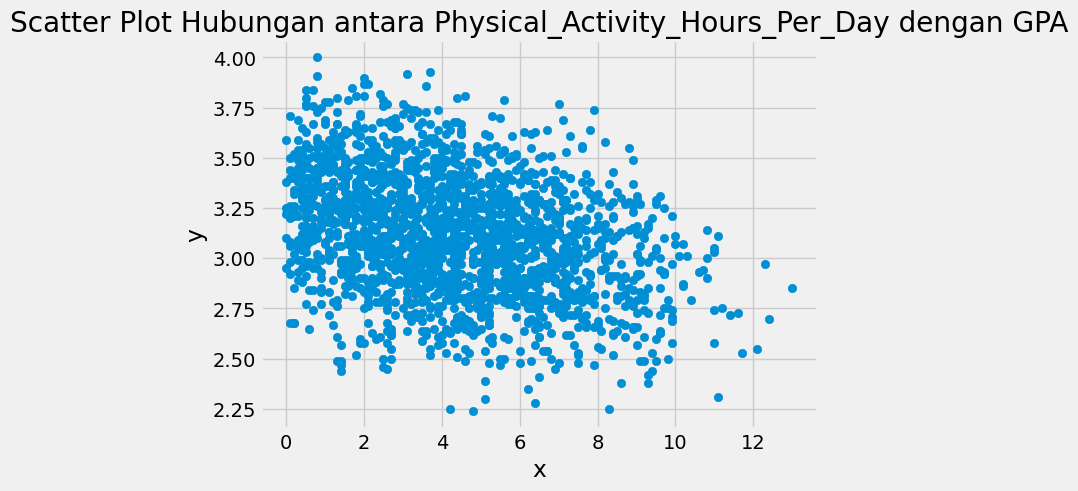

In [127]:
# Memunculkan Scatter Plot
plt.scatter(df_sederhana['x'], df_sederhana['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot Hubungan antara Physical_Activity_Hours_Per_Day dengan GPA')
plt.show()

In [128]:
""" Berdasarkan gambar scatter plot di atas terlihat titik-titik data membentuk garis linier menurun sehingga dapat disimpulkan bahwa terdapat hubungan linier negatif yang jelas antara lama jam beraktivitas fisik per hari dengan GPA."""

' Berdasarkan gambar scatter plot di atas terlihat titik-titik data membentuk garis linier menurun sehingga dapat disimpulkan bahwa terdapat hubungan linier negatif yang jelas antara lama jam beraktivitas fisik per hari dengan GPA.'

## Mengetahui Seberapa Kuat Hubungan Antara Physical_Activity_Hours_Per_Day dengan GPA Menggunakan Metode Analisis Korelasi Pearson

In [129]:
# Import Library yang Digunakan
from scipy.stats import pearsonr

# Menghitung Korelasi Pearson
list1 = df_sederhana['x']
list2 = df_sederhana['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: -0.34115


In [130]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.34115 disimpulkan bahwa hubungan antara Physical_Activity_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Social_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.34115 disimpulkan bahwa hubungan antara Physical_Activity_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Social_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

## Membentuk Model Regresi Linear Sederhana

In [131]:
# Memodelkan dengan Regresi Linear Sederhana
import numpy as np
import statsmodels.api as sm

x = df_sederhana[['x']]
y = df_sederhana['y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     263.2
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.08e-55
Time:                        11:57:42   Log-Likelihood:                -296.83
No. Observations:                2000   AIC:                             597.7
Df Residuals:                    1998   BIC:                             608.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2914      0.013    263.216      0.0

In [132]:
"""Berdasarkan gambar di atas didapatkan bahwa β₀ (intersep) = 3.2914, β₁ (koefisien parameter variabel dependen) = -0.0405 sehingga didapatkan Ytopi = (3.2914) + (-0.0405)x. """

'Berdasarkan gambar di atas didapatkan bahwa β₀ (intersep) = 3.2914, β₁ (koefisien parameter variabel dependen) = -0.0405 sehingga didapatkan Ytopi = (3.2914) + (-0.0405)x. '

In [133]:
# Interpretasi
""" untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.
untuk estimator β, apabila ada pertambahan satu satuan nilai physical_Activity_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0405."""

' untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.\nuntuk estimator β, apabila ada pertambahan satu satuan nilai physical_Activity_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0405.'

In [134]:
# Menghasilkan Nilai Prediksi Dari x
prediksi = model.predict(x)
print(prediksi)

0       3.218428
1       3.169794
2       3.104948
3       3.027944
4       3.023891
          ...   
1995    2.975257
1996    3.104948
1997    2.853671
1998    3.125213
1999    3.173847
Length: 2000, dtype: float64


In [135]:
# Menghasilkan Nilai Residual ei
residual = model.resid
print(residual)

0      -0.228428
1      -0.419794
2      -0.434948
3      -0.147944
4       0.486109
          ...   
1995    0.344743
1996   -0.454948
1997    0.286329
1998   -0.085213
1999    0.406153
Length: 2000, dtype: float64


## Melakukan Uji F

In [136]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = 0 (model tidak layak)
# H₁ : β₁ != 0 (model layak)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik F
from scipy.stats import f
F_hit = model.fvalue
df_model = model.df_model
df_resid = model.df_resid
alpha = 0.05
F_tabel = f.ppf(1 - alpha, df_model, df_resid)

# Menampilkan hasil dari uji f
print('Hasil dari F hitung adalah', round(F_hit,4))
print('Hasil dari F tabel adalah', round(F_tabel,4))

# Keputusan
if F_hit > F_tabel:
    print("Sehingga H0 ditolak yang artinya model layak untuk digunakan")

else:
    print("Sehingga H0 gagal tolak yang artinya model tidak layak digunakan")

Hasil dari F hitung adalah 263.1658
Hasil dari F tabel adalah 3.8461
Sehingga H0 ditolak yang artinya model layak untuk digunakan


In [137]:
# Kesimpulan
f'''Disimpulkan bahwa F hitung didapatkan hasil {round(F_hit, 4)} dan F tabel didapatkan hasil {round(F_tabel, 4)}  sehingga F hitung lebih besar dari F tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya model layak digunakan.'''

'Disimpulkan bahwa F hitung didapatkan hasil 263.1658 dan F tabel didapatkan hasil 3.8461  sehingga F hitung lebih besar dari F tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya model layak digunakan.'

## Mendapatkan Nilai R-Squared

In [138]:
# Nilai R-Squared
r_squared = f'''
Nilai R-Squared yang didapatkan dalam tabel model regresi linier sederhana di atas adalah {round(model.rsquared, 4)}, sehingga dapat disimpulkan sebesar 11,6% variabel Physical_Activity_Hours_Per_Day memengaruhi variabel GPA. Sisanya 88,4% dipengaruhi oleh variabel lainnya yang tidak diketahui.
'''
print(r_squared)


Nilai R-Squared yang didapatkan dalam tabel model regresi linier sederhana di atas adalah 0.1164, sehingga dapat disimpulkan sebesar 11,6% variabel Physical_Activity_Hours_Per_Day memengaruhi variabel GPA. Sisanya 88,4% dipengaruhi oleh variabel lainnya yang tidak diketahui.



## Melakukan Uji T

In [139]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : βj = 0, dimana j = 1,2,.. (tidak berpengaruh signifikan)
# H₁ : βj != 0, dimana j = 1,2,.. (berpengaruh signifikan)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik T
# Menggunakan scipy untuk menguji hipotesis Uji T
alpha = 0.05
DF = 2000-1 #Banyak sampel - Banyak variabel
T_tabel = stats.t.ppf(1-alpha/2, DF)
print('Hasil dari T tabel adalah', round(T_tabel,4))

# Keputusan Pyshical_Activity_Hours_Per_Day
T_hit = model.tvalues['x']
if T_hit > T_tabel:
    print("Nilai dari T hitung Pyshical_Activity_Hours_Per_Day adalah", round(T_hit,4))
    print("Sehingga H0 ditolak yang artinya variabel Pyshical_Activity_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")

else:
    print("Nilai dari T hitung Pyshical_Activity_Hours_Per_Day adalah", round(T_hit,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Pyshical_Activity_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

Hasil dari T tabel adalah 1.9612
Nilai dari T hitung Pyshical_Activity_Hours_Per_Day adalah -16.2224
Sehingga H0 gagal tolak yang artinya variabel Pyshical_Activity_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.


In [140]:
# Kesimpulan
f'''Disimpulkan bahwa T hitung Pyshical_Activity_Hours_Per_Day didapatkan hasil yaitu {round(T_hit,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih kecil dari T tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya lama jam beraktivitas fisik per hari tidak berpengaruh secara signifikan terhadap GPA setiap mahasiswa.'''

'Disimpulkan bahwa T hitung Pyshical_Activity_Hours_Per_Day didapatkan hasil yaitu -16.2224 dan T tabel didapatkan hasil yaitu 1.9612 sehingga T hitung lebih kecil dari T tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya lama jam beraktivitas fisik per hari tidak berpengaruh secara signifikan terhadap GPA setiap mahasiswa.'

# Analisis Regresi Linier Berganda

In [141]:
df_berganda = df[['Study_Hours_Per_Day',	'Extracurricular_Hours_Per_Day',	'Sleep_Hours_Per_Day',	'Social_Hours_Per_Day',	'Physical_Activity_Hours_Per_Day',	'GPA']]
df_berganda

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,6.9,3.8,8.7,2.8,1.8,2.99
1,5.3,3.5,8.0,4.2,3.0,2.75
2,5.1,3.9,9.2,1.2,4.6,2.67
3,6.5,2.1,7.2,1.7,6.5,2.88
4,8.1,0.6,6.5,2.2,6.6,3.51
...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32
1996,6.3,2.8,8.8,1.5,4.6,2.65
1997,6.2,0.0,6.2,0.8,10.8,3.14
1998,8.1,0.7,7.6,3.5,4.1,3.04


## Menentukan Variabel Independen dan Dependen

In [142]:
""" Dari dataset tersebut dapat diketahui bahwa variabel independen yang digunakan adalah Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, dan Physical_Activity_Hours_Per_Day. Sedangkan variabel dependen yang digunakan adalah GPA. """

' Dari dataset tersebut dapat diketahui bahwa variabel independen yang digunakan adalah Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, dan Physical_Activity_Hours_Per_Day. Sedangkan variabel dependen yang digunakan adalah GPA. '

# Mengubah DataFrame

In [143]:
# Mengganti Nama Variabel Menjadi X dan Y
df_berganda.rename(columns={'Study_Hours_Per_Day':'x1', 'Extracurricular_Hours_Per_Day':'x2', 'Sleep_Hours_Per_Day':'x3',
                   'Social_Hours_Per_Day':'x4', 'Physical_Activity_Hours_Per_Day':'x5', 'GPA':'y'}, inplace=True)
df_berganda.head()

,x1,x2,x3,x4,x5,y
0,6.9,3.8,8.7,2.8,1.8,2.99
1,5.3,3.5,8.0,4.2,3.0,2.75
2,5.1,3.9,9.2,1.2,4.6,2.67
3,6.5,2.1,7.2,1.7,6.5,2.88
4,8.1,0.6,6.5,2.2,6.6,3.51


# Mengetahui Seberapa Kuat Hubungan Variabel Dependen dan Variabel Independen Menggunakan Metode Analisis Korelasi Pearson

In [144]:
## Hubungan Study_Hours_Per_Day dengan GPA
# Import Library yang Digunakan
from scipy.stats import pearsonr

# Menghitung Korelasi Pearson
list1 = df_berganda['x1']
list2 = df_berganda['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: 0.73447


In [145]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai 0.73447 disimpulkan bahwa hubungan antara Study_Hours_Per_Day dengan GPA yaitu hubungan korelasi positif kuat karena lebih dari sama dengan 0.7 dan kurang dari sama dengan 1 sehingga apabila Study_Hours_Per_Day meningkat, maka GPA juga meningkat dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai 0.73447 disimpulkan bahwa hubungan antara Study_Hours_Per_Day dengan GPA yaitu hubungan korelasi positif kuat karena lebih dari sama dengan 0.7 dan kurang dari sama dengan 1 sehingga apabila Study_Hours_Per_Day meningkat, maka GPA juga meningkat dan sebaliknya.'

In [146]:
## Hubungan Extracurricular_Hours_Per_Day dengan GPA
# Import Library yang Digunakan
from scipy.stats import pearsonr

# Menghitung Korelasi Pearson
list1 = df_berganda['x2']
list2 = df_berganda['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: -0.03217


In [147]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.03217 disimpulkan bahwa hubungan antara Extracurricular_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Extracurricular_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.03217 disimpulkan bahwa hubungan antara Extracurricular_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Extracurricular_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

In [148]:
## Hubungan Sleep_Hours_Per_Day dengan GPA
# Convert dataframe into series
list1 = df_berganda['x3']
list2 = df_berganda['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson x3 dan y: %.5f' % corr)

Koefisien Pearson x3 dan y: -0.00428


In [149]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.00428 disimpulkan bahwa hubungan antara Sleep_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.00428 disimpulkan bahwa hubungan antara Sleep_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

In [150]:
## Hubungan Social_Hours_Per_Day dengan GPA
# Convert dataframe into series
list1 = df_berganda['x4']
list2 = df_berganda['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson x4 dan y: %.5f' % corr)

Koefisien Pearson x4 dan y: -0.08568


In [151]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.08568 disimpulkan bahwa hubungan antara Social_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif kuat karena lebih dari sama dengan -1 dan kurang dari sama dengan -0.7 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.08568 disimpulkan bahwa hubungan antara Social_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif kuat karena lebih dari sama dengan -1 dan kurang dari sama dengan -0.7 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

In [152]:
## Hubungan Physical_Activity_Hours_Per_Day dengan GPA
# Convert dataframe into series
list1 = df_berganda['x5']
list2 = df_berganda['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson x5 dan y: %.5f' % corr)

Koefisien Pearson x5 dan y: -0.34115


In [153]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.34115 disimpulkan bahwa hubungan antara Physical_Activity_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Physical_Activity_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.34115 disimpulkan bahwa hubungan antara Physical_Activity_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Physical_Activity_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

## Membentuk Model Regresi Berganda

In [154]:
# Memodelkan dengan Regresi Linear Sederhana Berganda
import numpy as np
import statsmodels.api as sm

x = df_berganda[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df_berganda['y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     587.8
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:57:42   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -706.1
Df Residuals:                    1995   BIC:                            -678.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0232      0.000    154.922      0.0

In [155]:
"""Berdasarkan gambar di atas didapatkan bahwa β₀ = 0.0232, β₁ = 0.2371, β₂ = 0.0752, β3 = 0.0781, β4 = 0.0840, β5 = 0.0827, sehingga didapatkan Ytopi =  0.0232 + (0.2371)x1 + (0.0752)x2 + (0.0781)x3 + (0.0840)x4 + (0.0827)x5. """

'Berdasarkan gambar di atas didapatkan bahwa β₀ = 0.0232, β₁ = 0.2371, β₂ = 0.0752, β3 = 0.0781, β4 = 0.0840, β5 = 0.0827, sehingga didapatkan Ytopi =  0.0232 + (0.2371)x1 + (0.0752)x2 + (0.0781)x3 + (0.0840)x4 + (0.0827)x5. '

In [156]:
# Interpretasi
""" untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.
untuk estimator β1, apabila ada pertambahan satu satuan nilai Study_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.2371 (jika variabel lain bernilai konstan).
untuk estimator β2, apabila ada pertambahan satu satuan nilai Extracurricular_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0752 (jika variabel lain bernilai konstan).
untuk estimator β3, apabila ada pertambahan satu satuan nilai Sleep_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0781 (jika variabel lain bernilai konstan).
untuk estimator β4, apabila ada pertambahan satu satuan nilai Social_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0840  (jika variabel lain bernilai konstan).
untuk estimator β5, apabila ada pertambahan satu satuan nilai Physical_Activity_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0827  (jika variabel lain bernilai konstan).
"""

' untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.\nuntuk estimator β1, apabila ada pertambahan satu satuan nilai Study_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.2371 (jika variabel lain bernilai konstan).\nuntuk estimator β2, apabila ada pertambahan satu satuan nilai Extracurricular_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0752 (jika variabel lain bernilai konstan).\nuntuk estimator β3, apabila ada pertambahan satu satuan nilai Sleep_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0781 (jika variabel lain bernilai konstan).\nuntuk estimator β4, apabila ada pertambahan satu satuan nilai Social_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0840  (jika variabel lain bernilai konstan).\nuntuk estimator β5, apabila ada pertambahan satu satuan nilai Physical_Activity_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0827  

In [157]:
# Menghasilkan Nilai Prediksi Dari x
prediksi = model.predict(x)
print(prediksi.head())

0    3.008170
1    2.768425
2    2.725155
3    2.964540
4    3.226640
dtype: float64


In [158]:
# Menghasilkan Nilai Residual ei
residual = model.resid
print(residual.head())

0   -0.018170
1   -0.018425
2   -0.055155
3   -0.084540
4    0.283360
dtype: float64


## Melakukan Uji F

In [159]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = β₂ = 0 (Tidak Berpengaruh)
# H₁ : βj != 0, dimana j = 1,2,... (Minimal Ada Satu yang Berpengaruh)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik F
from scipy.stats import f
F_hit = model.fvalue
df_model = model.df_model
df_resid = model.df_resid
alpha = 0.05
F_tabel = f.ppf(1 - alpha, df_model, df_resid)

# Menampilkan hasil dari uji f
print('Hasil dari F hitung adalah', round(F_hit,4))
print('Hasil dari F tabel adalah', round(F_tabel,4))

# Keputusan
if F_hit > F_tabel:
    print("Sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.")

else:
    print("Sehingga H0 gagal tolak yang artinya tidak ada variabel independen yang berpengaruh terhadap variabel dependennya.")

Hasil dari F hitung adalah 587.7749
Hasil dari F tabel adalah 2.3764
Sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.


In [160]:
# Kesimpulan
f'''Disimpulkan bahwa F hitung didapatkan hasil {round(F_hit, 4)} dan F tabel didapatkan hasil {round(F_tabel, 4)}  sehingga F hitung lebih besar dari F tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.'''

'Disimpulkan bahwa F hitung didapatkan hasil 587.7749 dan F tabel didapatkan hasil 2.3764  sehingga F hitung lebih besar dari F tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.'

## Mendapatkan Nilai R-Squared

In [161]:
# Nilai R-Squared
r_squared = f'''
Nilai R-Squared Adjusted yang didapatkan dalam tabel model regresi dummy di atas adalah {round(model.rsquared_adj, 4)}, sehingga dapat disimpulkan sebesar 54% variabel Study_Hours_Per_Day,
Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, dan Physical_Activity_Hours_Per_Day memengaruhi variabel GPA. Sisanya 46% dipengaruhi oleh variabel lainnya yang tidak diketahui.
'''
print(r_squared)


Nilai R-Squared Adjusted yang didapatkan dalam tabel model regresi dummy di atas adalah 0.54, sehingga dapat disimpulkan sebesar 54% variabel Study_Hours_Per_Day,
Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, dan Physical_Activity_Hours_Per_Day memengaruhi variabel GPA. Sisanya 46% dipengaruhi oleh variabel lainnya yang tidak diketahui.



## Melakukan Uji T

In [162]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : βj = 0, dimana j = 1,2,.. (tidak berpengaruh signifikan)
# H₁ : βj != 0, dimana j = 1,2,.. (berpengaruh signifikan)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik T
# Menggunakan scipy untuk menguji hipotesis Uji T
alpha = 0.05
DF = 2000-6 #Banyak sampel - Banyak variabel
T_tabel = stats.t.ppf(1-alpha/2, DF)
print('Hasil dari T tabel adalah', round(T_tabel,4))

# Keputusan Study_Hours_Per_Day
T_hitung_x1 = model.tvalues['x1']
if T_hitung_x1 > T_tabel:
    print("Nilai dari T hitung Study_Hours_Per_Day adalah", round(T_hitung_x1,4))
    print("Sehingga H0 ditolak yang artinya variabel Study_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Study_Hours_Per_Day adalah", round(T_hitung_x1,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Study_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Extracurricular_Hours_Per_Day
T_hitung_x2 = model.tvalues['x2']
if T_hitung_x2 > T_tabel:
    print("Nilai dari T hitung Extracurricular_Hours_Per_Day adalah", round(T_hitung_x2,4))
    print("Sehingga H0 ditolak yang artinya variabel Extracurricular_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Extracurricular_Hours_Per_Day adalah", round(T_hitung_x2,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Extracurricular_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Sleep_Hours_Per_Day
T_hitung_x3 = model.tvalues['x3']
if T_hitung_x3 > T_tabel:
    print("Nilai dari T hitung Sleep_Hours_Per_Day adalah", round(T_hitung_x3,4))
    print("Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Sleep_Hours_Per_Day adalah", round(T_hitung_x3,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Sleep_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Social_Hours_Per_Day
T_hitung_x4 = model.tvalues['x4']
if T_hitung_x4 > T_tabel:
    print("Nilai dari T hitung Social_Hours_Per_Day adalah", round(T_hitung_x4,4))
    print("Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Social_Hours_Per_Day adalah", round(T_hitung_x4,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Social_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Physical_Activity_Hours_Per_Day
T_hitung_x5 = model.tvalues['x5']
if T_hitung_x5 > T_tabel:
    print("Nilai dari T hitung Physical_Activity_Hours_Per_Day adalah", round(T_hitung_x5,4))
    print("Sehingga H0 ditolak yang artinya variabel Physical_Activity_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Physical_Activity_Hours_Per_Day adalah", round(T_hitung_x5,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Physical_Activity_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

Hasil dari T tabel adalah 1.9612
Nilai dari T hitung Study_Hours_Per_Day adalah 96.3015
Sehingga H0 ditolak yang artinya variabel Study_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Extracurricular_Hours_Per_Day adalah 19.5096
Sehingga H0 ditolak yang artinya variabel Extracurricular_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Sleep_Hours_Per_Day adalah 32.3959
Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Social_Hours_Per_Day adalah 33.1865
Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Physical_Activity_Hours_Per_Day adalah 52.5458
Sehingga H0 ditolak yang artinya variabel Physical_Activity_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.


In [163]:
# Kesimpulan
f'''Disimpulkan bahwa T hitung Study_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x1,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam belajar per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Extracurricular_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x2,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam ekstrakulikuler per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Sleep_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x3,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam tidur per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Social_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x4,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam bersosialisasi per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Physical_Activity_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x5,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam beraktivitas fisik per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
'''

'Disimpulkan bahwa T hitung Study_Hours_Per_Day didapatkan hasil yaitu 96.3015 dan T tabel didapatkan hasil yaitu 1.9612 sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam belajar per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.\nDisimpulkan bahwa T hitung Extracurricular_Hours_Per_Day didapatkan hasil yaitu 19.5096 dan T tabel didapatkan hasil yaitu 1.9612 sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam ekstrakulikuler per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.\nDisimpulkan bahwa T hitung Sleep_Hours_Per_Day didapatkan hasil yaitu 32.3959 dan T tabel didapatkan hasil yaitu 1.9612 sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam tidur per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.\nDisimpulkan bahwa T hitung Social_Hours_Per_Day didapatkan hasil yaitu 

## Uji Asumsi Regresi

### Memeriksa Asumsi Residual Berdistribusi Normal

#### Menggunakan Visualisasi

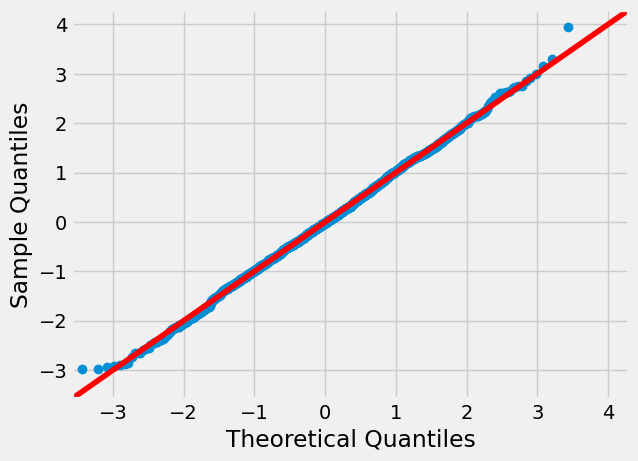

In [164]:
# Menggambar Plot QQ menggunakan package statmodels
fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

In [165]:
# Kesimpulan
print("Pada gambar di atas dapat disimpulkan bahwa distribusi data residual mendekati garis linier sehingga data tersebut memenuhi asumsi berdistribusi normal")

Pada gambar di atas dapat disimpulkan bahwa distribusi data residual mendekati garis linier sehingga data tersebut memenuhi asumsi berdistribusi normal


## Menggunakan Pengujian Statistika


In [166]:
# Pengujian Jarque
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 0.8496098559996786),
 ('Chi^2 two-tail prob.', 0.6538973297492647),
 ('Skew', 0.027893023833994265),
 ('Kurtosis', 3.084161957900117)]

In [167]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = 0 (Populasi Berdistribusi Normal)
# H₁ : β₁ != 0 (Populasi Tidak Berdistribusi Normal)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik
alpha = 0.05
DF = 5
chi2_tabel = stats.chi2.ppf(1 - alpha, DF)
print("Hasil dari Tabel Chi-Square adalah", round(chi2_tabel,4))

## Keputusan
JB = 0.6348465282292955 # Didapatkan dari Pengujian Jarque
if JB > chi2_tabel:
    print("Hasil dari Jarque-Bera adalah", round(JB,4))
    print("Sehingga H0 ditolak yang artinya tidak memenuhi asumsi berdistribusi normal.")

else:
    print("Hasil dari Jarque-Bera adalah", round(JB,4))
    print("Sehingga H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.")


Hasil dari Tabel Chi-Square adalah 11.0705
Hasil dari Jarque-Bera adalah 0.6348
Sehingga H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.


In [168]:
f'''Disimpulkan bahwa nilai Jarque-Bera didapatkan hasil yaitu {round(JB,4)} dan T tabel didapatkan hasil yaitu {round(chi2_tabel,4)} sehingga nilai Jarque-Bera lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.'''


'Disimpulkan bahwa nilai Jarque-Bera didapatkan hasil yaitu 0.6348 dan T tabel didapatkan hasil yaitu 11.0705 sehingga nilai Jarque-Bera lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.'

### Memeriksa Asumsi Residual Tidak Terjadi Autokorelasi


#### Menggunakan Visualisasi


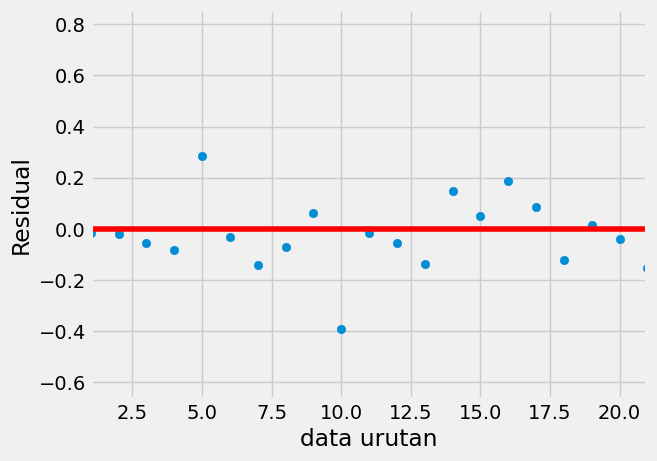

In [169]:
# Plot memeriksa asumsi residual tidak terjadi autokorelasi
urutan_pengamatan = pd.Series(range(1,2001))
plt.scatter(urutan_pengamatan, residual);
plt.axhline(0, color='red')
plt.xlabel('data urutan');
plt.ylabel('Residual');
plt.xlim([1,21]);

In [170]:
# Kesimpulan
print("Pada gambar di atas dapat disimpulkan bahwa distribusi data residual terhadap plot membentuk pola yang acak di sekitar garis nol sehingga dapat disimpulkan bahwa data residual tidak terjadi autokorelasi yang artinya residual ini memenuhi asumsi.")

Pada gambar di atas dapat disimpulkan bahwa distribusi data residual terhadap plot membentuk pola yang acak di sekitar garis nol sehingga dapat disimpulkan bahwa data residual tidak terjadi autokorelasi yang artinya residual ini memenuhi asumsi.


#### Menggunakan Pengujian Statistika


In [171]:
# Pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw}")

Durbin-Watson: 2.0059109868008242


In [172]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = 0 (Terjadi Autokorelasi)
# H₁ : β₁ != 0 (Tidak Terjadi Autokorelasi)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik
dw = 2.0033696707617374
n = 2000
k = 6

# Nilai batas bawah (dl) dan batas atas (du) untuk sampel sebanyak 2000 dan variabel sebanyak 6 dapat dilihat pada tabel Durbin Watson sehingga didapatkan nilai dl = 1.92046 dan du = 1.93249.
dl = 1.92046
du = 1.93249
print("Hasil dari dl adalah", round(dl,4))
print("Hasil dari du adalah", round(du,4))

## Keputusan
if dw < dl:
    print("Hasil dari Durbin-Watson adalah", round(dw,4))
    print("sehingga H0 ditolak yang artinya residual tidak terjadi autokorelasi.")
elif dw > du:
    print("Hasil dari Durbin-Watson adalah", round(dw,4))
    print("H0 gagal tolak yang artinya residual terjadi autokorelasi.")
elif dl <= dw <= du:
    print("Hasil dari Durbin-Watson adalah", round(dw,4))
    print("Tidak dapat menarik kesimpulan dengan metode Durbin-Watson bahwa residual terjadi autokorelasi atau tidak")
else:
    print("Hasil uji tidak konklusif.")


Hasil dari dl adalah 1.9205
Hasil dari du adalah 1.9325
Hasil dari Durbin-Watson adalah 2.0034
H0 gagal tolak yang artinya residual terjadi autokorelasi.


In [173]:
f'''Disimpulkan bahwa nilai Durbin-Watson didapatkan hasil yaitu {round(dw,4)}, dl didapatkan hasil yaitu {round(dl,4)}, dan du didapatkan hasil yaitu {round(du,4)} sehingga nilai Durbin-Watson lebih besar dari du maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual terjadi autokorelasi.'''

'Disimpulkan bahwa nilai Durbin-Watson didapatkan hasil yaitu 2.0034, dl didapatkan hasil yaitu 1.9205, dan du didapatkan hasil yaitu 1.9325 sehingga nilai Durbin-Watson lebih besar dari du maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual terjadi autokorelasi.'

### Memeriksa Asumsi Residual Tidak Terjadi Heteroskedastisitas


#### Menggunakan Visualisasi

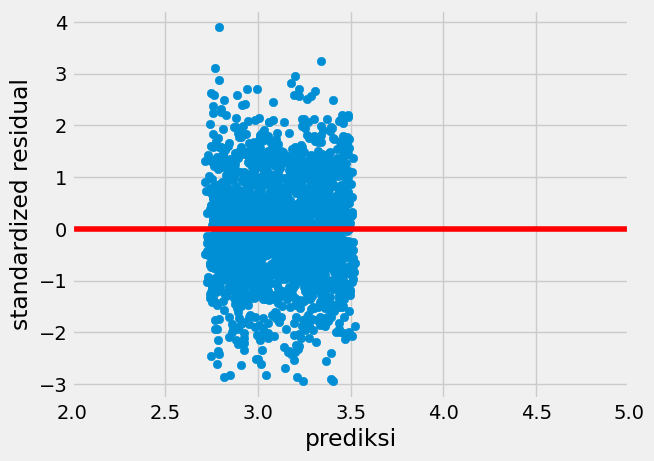

In [174]:
# Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()

# Menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual);
plt.axhline(0, color='red')
plt.xlabel('prediksi');
plt.ylabel('standardized residual');
plt.xlim([2,5]);

In [175]:

# Kesimpulan
print("Pada gambar di atas dapat disimpulkan bahwa data varians residual yang diwakili oleh standardized residualnya tidak membesar dan mengecil atau tersebar secara random sehingga dapat diartikan residual memenuhi asumsi tidak terjadi heteroskedastisitas.")

Pada gambar di atas dapat disimpulkan bahwa data varians residual yang diwakili oleh standardized residualnya tidak membesar dan mengecil atau tersebar secara random sehingga dapat diartikan residual memenuhi asumsi tidak terjadi heteroskedastisitas.


#### Menggunakan Pengujian Statistika


In [176]:
# Pengujian Breush-Pagan
from statsmodels.compat import lzip
import statsmodels.formula.api as smf

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 2.047889262986269),
 ('p-value', 0.8424797602119181),
 ('f-value', 0.5112158416738296),
 ('f p-value', 0.7275116679320403)]

In [177]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = 0 (Terjadi Heteroskedastisitas)
# H₁ : β₁ != 0 (Tidak Terjadi Heteroskedastisitas)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik
BP = 3.1224261819329246
alpha = 0.05
DF = 5
chi2_tabel = stats.chi2.ppf(1 - alpha, DF)
print("Hasil dari Tabel Chi-Square adalah", chi2_tabel)

## Keputusan
if BP > chi2_tabel:
    print("Hasil dari Breush-Pagan adalah", round(BP,4))
    print("Sehingga  H0 ditolak yang artinya asumsi residual terjadi heteroskedastisitas.")
else:
    print("Hasil dari Breush-Pagan adalah", round(BP,4))
    print("Sehingga H0 gagal tolak yang artinya asumsi residual tidak terjadi heteroskedastisitas.")

Hasil dari Tabel Chi-Square adalah 11.070497693516351
Hasil dari Breush-Pagan adalah 3.1224
Sehingga H0 gagal tolak yang artinya asumsi residual tidak terjadi heteroskedastisitas.


In [178]:
# Kesimpulan
f'''Disimpulkan bahwa nilai Breush-Pagan didapatkan hasil yaitu {round(BP,4)} dan chi2 tabel didapatkan hasil yaitu {round(BP,4)} sehingga nilai Breush-Pagan lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual tidak terjadi heteroskedastisitas.'''

'Disimpulkan bahwa nilai Breush-Pagan didapatkan hasil yaitu 3.1224 dan chi2 tabel didapatkan hasil yaitu 3.1224 sehingga nilai Breush-Pagan lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual tidak terjadi heteroskedastisitas.'

## Memeriksa Apakah Variabel Independen Memenuhi Asumsi Multikolinieritas


In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Himpunan variabel Independen
X = df_berganda[['x1', 'x2', 'x3', 'x4', 'x5']]

# VIF DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Menghitung VIF untuk setiap variabel
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0      x1  17.077219
1      x2   3.843071
2      x3  16.528840
3      x4   3.181087
4      x5   3.031613


In [180]:
# Kesimpulan
""" Dapat disimpulkan bahwa variabel independen memenuhi asumsi multikolinieritas karena terdapat hasil VIF yang lebih dari 10 yaitu pada variabel x1(Study_Hours_Per_Day) dan x3(Sleep_Hours_Per_Day)."""

' Dapat disimpulkan bahwa variabel independen memenuhi asumsi multikolinieritas karena terdapat hasil VIF yang lebih dari 10 yaitu pada variabel x1(Study_Hours_Per_Day) dan x3(Sleep_Hours_Per_Day).'

# Analisis Regresi Dummy

## Menentukan Variabel Independen dan Dependen

In [181]:
""" Dari dataset tersebut dapat diketahui bahwa variabel independen yang digunakan adalah Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, dan Stress_Level. Sedangkan variabel dependen yang digunakan adalah GPA. """

' Dari dataset tersebut dapat diketahui bahwa variabel independen yang digunakan adalah Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, dan Stress_Level. Sedangkan variabel dependen yang digunakan adalah GPA. '

In [191]:
df_dummy = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Stress_Level', 'GPA']]
df_dummy

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,GPA
0,6.9,3.8,8.7,2.8,1.8,Moderate,2.99
1,5.3,3.5,8.0,4.2,3.0,Low,2.75
2,5.1,3.9,9.2,1.2,4.6,Low,2.67
3,6.5,2.1,7.2,1.7,6.5,Moderate,2.88
4,8.1,0.6,6.5,2.2,6.6,High,3.51
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,Moderate,3.32
1996,6.3,2.8,8.8,1.5,4.6,Moderate,2.65
1997,6.2,0.0,6.2,0.8,10.8,Moderate,3.14
1998,8.1,0.7,7.6,3.5,4.1,High,3.04


## Mengubah DataFrame

---



In [192]:
# Mengganti nilai kategori stress level menjadi numerik
def ganti_nilai_stress(x):
    if x == 'Low':
      return 0
    elif x == 'Moderate':
      return 1
    elif x == 'High':
      return 2
    else:
        return None

df_dummy['Stress_Level'] = df_dummy['Stress_Level'].apply(ganti_nilai_stress)
df_dummy

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,GPA
0,6.9,3.8,8.7,2.8,1.8,1,2.99
1,5.3,3.5,8.0,4.2,3.0,0,2.75
2,5.1,3.9,9.2,1.2,4.6,0,2.67
3,6.5,2.1,7.2,1.7,6.5,1,2.88
4,8.1,0.6,6.5,2.2,6.6,2,3.51
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,1,3.32
1996,6.3,2.8,8.8,1.5,4.6,1,2.65
1997,6.2,0.0,6.2,0.8,10.8,1,3.14
1998,8.1,0.7,7.6,3.5,4.1,2,3.04


# Mengetahui Seberapa Kuat Hubungan Variabel Dependen dan Variabel Independen Menggunakan Metode Analisis Korelasi Pearson

In [193]:
# Melakukan uji korelasi pearson
Tcorrelation = df_dummy.corr(method='pearson')
Tcorrelation

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,GPA
Study_Hours_Per_Day,1.000000,-0.002629,0.026717,-0.137820,-0.488113,0.738843,0.734468
Extracurricular_Hours_Per_Day,-0.002629,1.000000,0.008844,-0.139081,-0.369989,-0.006099,-0.032174
Sleep_Hours_Per_Day,0.026717,0.008844,1.000000,-0.193556,-0.470302,-0.298917,-0.004278
Social_Hours_Per_Day,-0.137820,-0.139081,-0.193556,1.000000,-0.417142,-0.054702,-0.085677
Physical_Activity_Hours_Per_Day,-0.488113,-0.369989,-0.470302,-0.417142,1.000000,-0.205207,-0.341152
Stress_Level,0.738843,-0.006099,-0.298917,-0.054702,-0.205207,1.000000,0.550395
GPA,0.734468,-0.032174,-0.004278,-0.085677,-0.341152,0.550395,1.000000


<Axes: >

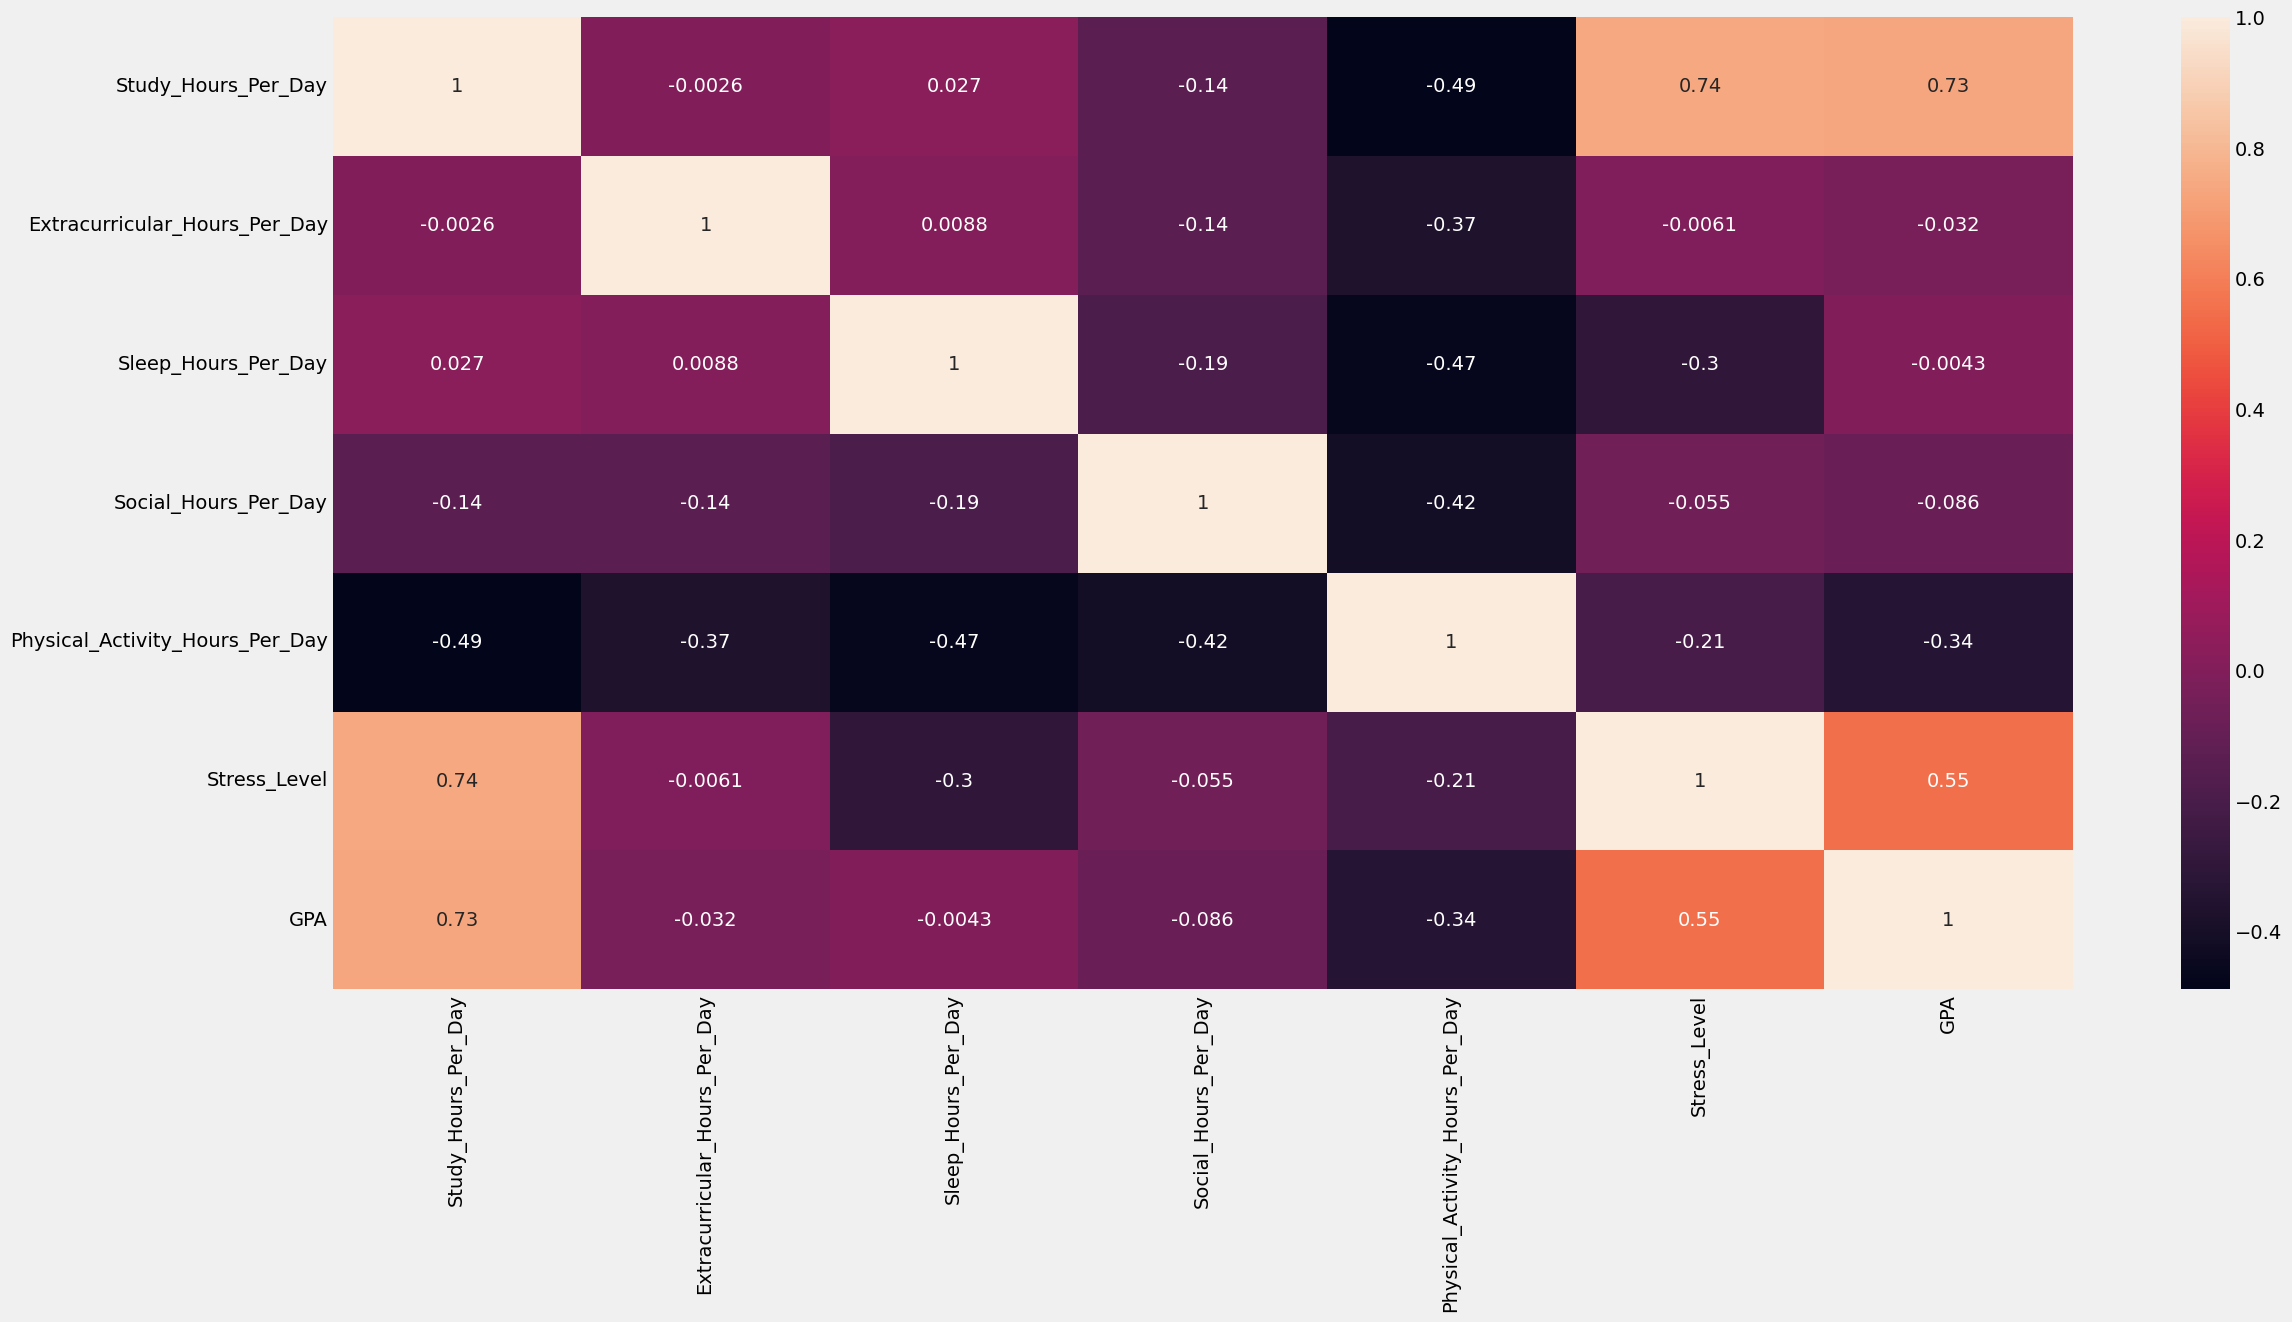

In [194]:
# Memvisualisasikan heatmap
corr= df_dummy.corr()
plt.figure(figsize=(25,12))
sns.heatmap(corr,annot=True)

In [196]:
# Mengganti nama kolom variabel dependen dan independen
df_dummy.rename(columns={'Study_Hours_Per_Day':'x1', 'Extracurricular_Hours_Per_Day':'x2', 'Sleep_Hours_Per_Day':'x3',
                   'Social_Hours_Per_Day':'x4', 'Physical_Activity_Hours_Per_Day':'x5', 'Stress_Level':'x6', 'GPA':'y'}, inplace=True)
df_dummy.head()

,x1,x2,x3,x4,x5,x6,y
0,6.9,3.8,8.7,2.8,1.8,1,2.99
1,5.3,3.5,8.0,4.2,3.0,0,2.75
2,5.1,3.9,9.2,1.2,4.6,0,2.67
3,6.5,2.1,7.2,1.7,6.5,1,2.88
4,8.1,0.6,6.5,2.2,6.6,2,3.51


In [197]:
## Hubungan Study_Hours_Per_Day dengan GPA
# Import Library yang Digunakan
from scipy.stats import pearsonr

# Menghitung Korelasi Pearson
list1 = df_dummy['x1']
list2 = df_dummy['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: 0.73447


In [198]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai 0.73447 disimpulkan bahwa hubungan antara Study_Hours_Per_Day dengan GPA yaitu hubungan korelasi positif kuat karena lebih dari sama dengan 0.7 dan kurang dari sama dengan 1 sehingga apabila Study_Hours_Per_Day meningkat, maka GPA juga meningkat dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai 0.73447 disimpulkan bahwa hubungan antara Study_Hours_Per_Day dengan GPA yaitu hubungan korelasi positif kuat karena lebih dari sama dengan 0.7 dan kurang dari sama dengan 1 sehingga apabila Study_Hours_Per_Day meningkat, maka GPA juga meningkat dan sebaliknya.'

In [199]:
## Hubungan Extracurricular_Hours_Per_Day dengan GPA
# Import Library yang Digunakan
from scipy.stats import pearsonr

# Menghitung Korelasi Pearson
list1 = df_dummy['x2']
list2 = df_dummy['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: -0.03217


In [200]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.03217 disimpulkan bahwa hubungan antara Extracurricular_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Extracurricular_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.03217 disimpulkan bahwa hubungan antara Extracurricular_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Extracurricular_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

In [201]:
## Hubungan Sleep_Hours_Per_Day dengan GPA
# Convert dataframe into series
list1 = df_dummy['x3']
list2 = df_dummy['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson x3 dan y: %.5f' % corr)

Koefisien Pearson x3 dan y: -0.00428


In [202]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.00428 disimpulkan bahwa hubungan antara Sleep_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.00428 disimpulkan bahwa hubungan antara Sleep_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

In [203]:
## Hubungan Social_Hours_Per_Day dengan GPA
# Convert dataframe into series
list1 = df_dummy['x4']
list2 = df_dummy['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson x4 dan y: %.5f' % corr)

Koefisien Pearson x4 dan y: -0.08568


In [204]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.08568 disimpulkan bahwa hubungan antara Social_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif kuat karena lebih dari sama dengan -1 dan kurang dari sama dengan -0.7 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.08568 disimpulkan bahwa hubungan antara Social_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif kuat karena lebih dari sama dengan -1 dan kurang dari sama dengan -0.7 sehingga apabila Sleep_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

In [205]:
## Hubungan Physical_Activity_Hours_Per_Day dengan GPA
# Convert dataframe into series
list1 = df_dummy['x5']
list2 = df_dummy['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson x5 dan y: %.5f' % corr)

Koefisien Pearson x5 dan y: -0.34115


In [206]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai -0.34115 disimpulkan bahwa hubungan antara Physical_Activity_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Physical_Activity_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai -0.34115 disimpulkan bahwa hubungan antara Physical_Activity_Hours_Per_Day dengan GPA yaitu hubungan korelasi negatif lemah karena lebih dari sama dengan -0.3 dan kurang dari sama dengan 0 sehingga apabila Physical_Activity_Hours_Per_Day meningkat, maka GPA menurun dan sebaliknya.'

In [207]:
## Hubungan Stress_Level dengan GPA
# Convert dataframe into series
list1 = df_dummy['x6']
list2 = df_dummy['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson x6 dan y: %.5f' % corr)

Koefisien Pearson x6 dan y: 0.55039


In [208]:
# Kesimpulan
"""Dari nilai koefisien Pearson di atas yang bernilai 0.55039 disimpulkan bahwa hubungan antara Stress_Level dengan GPA yaitu hubungan korelasi positif cukup kuat karena lebih dari sama dengan 0.3 dan kurang dari sama dengan 0.7 sehingga apabila Stress_Level meningkat, maka GPA juga meningkat dan sebaliknya."""

'Dari nilai koefisien Pearson di atas yang bernilai 0.55039 disimpulkan bahwa hubungan antara Stress_Level dengan GPA yaitu hubungan korelasi positif cukup kuat karena lebih dari sama dengan 0.3 dan kurang dari sama dengan 0.7 sehingga apabila Stress_Level meningkat, maka GPA juga meningkat dan sebaliknya.'

# Membentuk Model Regresi Dummy

In [209]:
# Memodelkan dengan Regresi Dummy
df_with_dummies = pd.get_dummies(data=df_dummy, columns=['x6'])
x = df_with_dummies[['x1', 'x2', 'x3', 'x4', 'x5', 'x6_0', 'x6_1']]
y = df_with_dummies['y']
reg_mod = 'y ~ x1+x2+x3+x4+x5+x6_0+x6_1'
model = smf.ols(formula=reg_mod, data=df_with_dummies).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     392.7
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:03:17   Log-Likelihood:                 359.77
No. Observations:                2000   AIC:                            -705.5
Df Residuals:                    1993   BIC:                            -666.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0232      0.000    123.932   

In [247]:
"""Berdasarkan gambar di atas didapatkan bahwa β₀ = 0.0232, β₁ = 0.2367, β₂ = 0.0752, β3 = 0.0790, β4 = 0.0841, β5 = 0.0827, β6_0 = 0.0066, β6_1 = -0.0158, sehingga didapatkan Ytopi =  0.0232 + (0.2367)x1 + (0.0752)x2 + (0.0790)x3 + (0.0752)x4 + (0.0841)x5 + (0.0827)x6. """

'Berdasarkan gambar di atas didapatkan bahwa β₀ = 0.0232, β₁ = 0.2367, β₂ = 0.0752, β3 = 0.0790, β4 = 0.0841, β5 = 0.0827, β6_0 = 0.0066, β6_1 = -0.0158, sehingga didapatkan Ytopi =  0.0232 + (0.2367)x1 + (0.0752)x2 + (0.0790)x3 + (0.0752)x4 + (0.0841)x5 + (0.0827)x6. '

In [211]:
# Interpretasi
""" untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.
untuk estimator β1, apabila ada pertambahan satu satuan nilai Study_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.2367  (jika variabel lain bernilai konstan).
untuk estimator β2, apabila ada pertambahan satu satuan nilai Extracurricular_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0752 (jika variabel lain bernilai konstan).
untuk estimator β3, apabila ada pertambahan satu satuan nilai Sleep_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0790 (jika variabel lain bernilai konstan).
untuk estimator β4, apabila ada pertambahan satu satuan nilai Social_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0841  (jika variabel lain bernilai konstan).
untuk estimator β5, apabila ada pertambahan satu satuan nilai Physical_Activity_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0827  (jika variabel lain bernilai konstan).
untuk estimator β6_0, apabila ada pertambahan satu satuan nilai Physical_Activity_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0066  (jika variabel lain bernilai konstan).
untuk estimator β6_0, apabila ada pertambahan satu satuan nilai Physical_Activity_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar -0.0158  (jika variabel lain bernilai konstan).
"""

' untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.\nuntuk estimator β1, apabila ada pertambahan satu satuan nilai Study_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.2367  (jika variabel lain bernilai konstan).\nuntuk estimator β2, apabila ada pertambahan satu satuan nilai Extracurricular_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0752 (jika variabel lain bernilai konstan).\nuntuk estimator β3, apabila ada pertambahan satu satuan nilai Sleep_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0790 (jika variabel lain bernilai konstan).\nuntuk estimator β4, apabila ada pertambahan satu satuan nilai Social_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0841  (jika variabel lain bernilai konstan).\nuntuk estimator β5, apabila ada pertambahan satu satuan nilai Physical_Activity_Hours_Per_Day, maka akan meningkatkan GPA setiap mahasiswa sebesar 0.0827 

In [212]:
# Menghasilkan Nilai Prediksi Dari x
prediksi = model.predict(x)
print(prediksi.head())

0    2.998148
1    2.780900
2    2.738457
3    2.953070
4    3.229697
dtype: float64


In [213]:
# Menghasilkan Nilai Residual ei
residual = model.resid
print(residual.head())

0   -0.008148
1   -0.030900
2   -0.068457
3   -0.073070
4    0.280303
dtype: float64


# Melakukan Uji F

In [214]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = β₂ = 0 (Tidak Berpengaruh)
# H₁ : βj != 0, dimana j = 1,2,... (Minimal Ada Satu yang Berpengaruh)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik F
from scipy.stats import f
F_hit = model.fvalue
df_model = model.df_model
df_resid = model.df_resid
alpha = 0.05
F_tabel = f.ppf(1 - alpha, df_model, df_resid)

# Menampilkan hasil dari uji f
print('Hasil dari F hitung adalah', round(F_hit,4))
print('Hasil dari F tabel adalah', round(F_tabel,4))

# Keputusan
if F_hit > F_tabel:
    print("Sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.")

else:
    print("Sehingga H0 gagal tolak yang artinya tidak ada variabel independen yang berpengaruh terhadap variabel dependennya.")

Hasil dari F hitung adalah 392.6932
Hasil dari F tabel adalah 2.1031
Sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.


In [215]:
# Kesimpulan
f'''Disimpulkan bahwa F hitung didapatkan hasil {round(F_hit, 4)} dan F tabel didapatkan hasil {round(F_tabel, 4)}  sehingga F hitung lebih besar dari F tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.'''

'Disimpulkan bahwa F hitung didapatkan hasil 392.6932 dan F tabel didapatkan hasil 2.1031  sehingga F hitung lebih besar dari F tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.'

# Mendapatkan Nilai R-Squared

In [216]:
# Nilai R-Squared
r_squared = f'''
Nilai R-Squared Adjusted yang didapatkan dalam tabel model regresi dummy di atas adalah {round(model.rsquared_adj, 4)}, sehingga dapat disimpulkan sebesar 54% variabel Study_Hours_Per_Day,
Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, dan Stress_Level memengaruhi variabel GPA. Sisanya 46% dipengaruhi oleh variabel lainnya yang tidak diketahui.
'''
print(r_squared)


Nilai R-Squared Adjusted yang didapatkan dalam tabel model regresi dummy di atas adalah 0.5404, sehingga dapat disimpulkan sebesar 54% variabel Study_Hours_Per_Day,
Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, dan Stress_Level memengaruhi variabel GPA. Sisanya 46% dipengaruhi oleh variabel lainnya yang tidak diketahui.



# Melakukan Uji T

In [217]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : βj = 0, dimana j = 1,2,.. (tidak berpengaruh signifikan)
# H₁ : βj != 0, dimana j = 1,2,.. (berpengaruh signifikan)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik T
# Menggunakan scipy untuk menguji hipotesis Uji T
alpha = 0.05
DF = 2000-7 #Banyak sampel - Banyak variabel
T_tabel = stats.t.ppf(1-alpha/2, DF)
print('Hasil dari T tabel adalah', round(T_tabel,4))

# Keputusan Study_Hours_Per_Day
T_hitung_x1 = model.tvalues['x1']
if T_hitung_x1 > T_tabel:
    print("Nilai dari T hitung Study_Hours_Per_Day adalah", round(T_hitung_x1,4))
    print("Sehingga H0 ditolak yang artinya variabel Study_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Study_Hours_Per_Day adalah", round(T_hitung_x1,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Study_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Extracurricular_Hours_Per_Day
T_hitung_x2 = model.tvalues['x2']
if T_hitung_x2 > T_tabel:
    print("Nilai dari T hitung Extracurricular_Hours_Per_Day adalah", round(T_hitung_x2,4))
    print("Sehingga H0 ditolak yang artinya variabel Extracurricular_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Extracurricular_Hours_Per_Day adalah", round(T_hitung_x2,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Extracurricular_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Sleep_Hours_Per_Day
T_hitung_x3 = model.tvalues['x3']
if T_hitung_x3 > T_tabel:
    print("Nilai dari T hitung Sleep_Hours_Per_Day adalah", round(T_hitung_x3,4))
    print("Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Sleep_Hours_Per_Day adalah", round(T_hitung_x3,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Sleep_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Social_Hours_Per_Day
T_hitung_x4 = model.tvalues['x4']
if T_hitung_x4 > T_tabel:
    print("Nilai dari T hitung Social_Hours_Per_Day adalah", round(T_hitung_x4,4))
    print("Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Social_Hours_Per_Day adalah", round(T_hitung_x4,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Social_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Physical_Activity_Hours_Per_Day
T_hitung_x5 = model.tvalues['x5']
if T_hitung_x5 > T_tabel:
    print("Nilai dari T hitung Physical_Activity_Hours_Per_Day adalah", round(T_hitung_x5,4))
    print("Sehingga H0 ditolak yang artinya variabel Physical_Activity_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Physical_Activity_Hours_Per_Day adalah", round(T_hitung_x5,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Physical_Activity_Hours_Per_Day tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Stress_Level Low
T_hitung_x6_0 = model.tvalues['x6_0[T.True]']
if T_hitung_x6_0 > T_tabel:
    print("Nilai dari T hitung Stress_Level Low adalah", round(T_hitung_x6_0,4))
    print("Sehingga H0 ditolak yang artinya variabel Stress_Level Low berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Stress_Level Low adalah", round(T_hitung_x6_0,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Stress_Level Low tidak berpengaruh signifikan terhadap variabel GPA.")

# Keputusan Stress_Level Medium
T_hitung_x6_1 = model.tvalues['x6_1[T.True]']
if T_hitung_x6_1 > T_tabel:
    print("Nilai dari T hitung Stress_Level Medium adalah", round(T_hitung_x6_1,4))
    print("Sehingga H0 ditolak yang artinya variabel Stress_Level Medium berpengaruh signifikan terhadap variabel GPA.")
else:
    print("Nilai dari T hitung Stress_Level Medium adalah", round(T_hitung_x6_1,4))
    print("Sehingga H0 gagal tolak yang artinya variabel Stress_Level Medium tidak berpengaruh signifikan terhadap variabel GPA.")

Hasil dari T tabel adalah 1.9612
Nilai dari T hitung Study_Hours_Per_Day adalah 60.7938
Sehingga H0 ditolak yang artinya variabel Study_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Extracurricular_Hours_Per_Day adalah 18.9034
Sehingga H0 ditolak yang artinya variabel Extracurricular_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Sleep_Hours_Per_Day adalah 21.8269
Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Social_Hours_Per_Day adalah 30.7036
Sehingga H0 ditolak yang artinya variabel Sleep_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Physical_Activity_Hours_Per_Day adalah 44.5808
Sehingga H0 ditolak yang artinya variabel Physical_Activity_Hours_Per_Day berpengaruh signifikan terhadap variabel GPA.
Nilai dari T hitung Stress_Level Low adalah 0.3092
Sehingga H0 gagal tolak yang artinya variabel Stress_Lev

In [218]:
# Kesimpulan
f'''Disimpulkan bahwa T hitung Study_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x1,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam belajar per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Extracurricular_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x2,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam ekstrakulikuler per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Sleep_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x3,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam tidur per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Social_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x4,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam bersosialisasi per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Physical_Activity_Hours_Per_Day didapatkan hasil yaitu {round(T_hitung_x5,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam beraktivitas fisik per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Stress_Level Low didapatkan hasil yaitu {round(T_hitung_x6_0,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya tingkatan setres rendah berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
Disimpulkan bahwa T hitung Stress_Level Medium didapatkan hasil yaitu {round(T_hitung_x6_1,4)} dan T tabel didapatkan hasil yaitu {round(T_tabel,4)} sehingga T hitung lebih kecil dari T tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya tingkatan setres sedang tidak berpengaruh secara signifikan terhadap GPA setiap mahasiswa.
'''

'Disimpulkan bahwa T hitung Study_Hours_Per_Day didapatkan hasil yaitu 60.7938 dan T tabel didapatkan hasil yaitu 1.9612 sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam belajar per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.\nDisimpulkan bahwa T hitung Extracurricular_Hours_Per_Day didapatkan hasil yaitu 18.9034 dan T tabel didapatkan hasil yaitu 1.9612 sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam ekstrakulikuler per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.\nDisimpulkan bahwa T hitung Sleep_Hours_Per_Day didapatkan hasil yaitu 21.8269 dan T tabel didapatkan hasil yaitu 1.9612 sehingga T hitung lebih besar dari T tabel maka dapat disimpulkan bahwa H0 ditolak yang artinya lama jam tidur per hari berpengaruh secara signifikan terhadap GPA setiap mahasiswa.\nDisimpulkan bahwa T hitung Social_Hours_Per_Day didapatkan hasil yaitu 

# Uji Asumsi Regresi

## Memeriksa Asumsi Residual Berdistribusi Normal

### Menggunakan Visualisasi

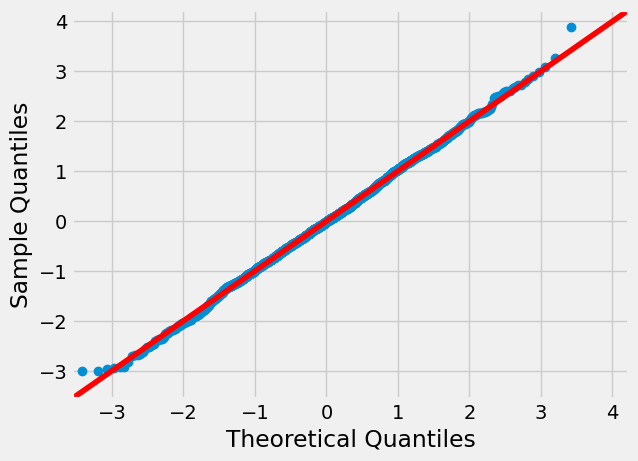

In [219]:
# Menggambar Plot QQ menggunakan package statmodels
fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

In [220]:
# Kesimpulan
print("Pada gambar di atas dapat disimpulkan bahwa distribusi data residual mendekati garis linier sehingga data tersebut memenuhi asumsi berdistribusi normal")

Pada gambar di atas dapat disimpulkan bahwa distribusi data residual mendekati garis linier sehingga data tersebut memenuhi asumsi berdistribusi normal


### Menggunakan Pengujian Statistika

In [221]:
# Pengujian Jarque
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 0.6348465282292955),
 ('Chi^2 two-tail prob.', 0.7280225440854007),
 ('Skew', 0.02520767372968559),
 ('Kurtosis', 3.0712492180960775)]

In [222]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = 0 (Populasi Berdistribusi Normal)
# H₁ : β₁ != 0 (Populasi Tidak Berdistribusi Normal)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik
alpha = 0.05
DF = 6
chi2_tabel = stats.chi2.ppf(1 - alpha, DF)
print("Hasil dari Tabel Chi-Square adalah", round(chi2_tabel,4))

## Keputusan
JB = 0.6348465282292955 # Didapatkan dari Pengujian Jarque
if JB > chi2_tabel:
    print("Hasil dari Jarque-Bera adalah", round(JB,4))
    print("Sehingga H0 ditolak yang artinya tidak memenuhi asumsi berdistribusi normal.")

else:
    print("Hasil dari Jarque-Bera adalah", round(JB,4))
    print("Sehingga H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.")

Hasil dari Tabel Chi-Square adalah 12.5916
Hasil dari Jarque-Bera adalah 0.6348
Sehingga H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.


In [223]:
f'''Disimpulkan bahwa nilai Jarque-Bera didapatkan hasil yaitu {round(JB,4)} dan T tabel didapatkan hasil yaitu {round(chi2_tabel,4)} sehingga nilai Jarque-Bera lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.'''


'Disimpulkan bahwa nilai Jarque-Bera didapatkan hasil yaitu 0.6348 dan T tabel didapatkan hasil yaitu 12.5916 sehingga nilai Jarque-Bera lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual memenuhi asumsi berdistribusi normal.'

## Memeriksa Asumsi Residual Tidak Terjadi Autokorelasi

### Menggunakan Visualisasi

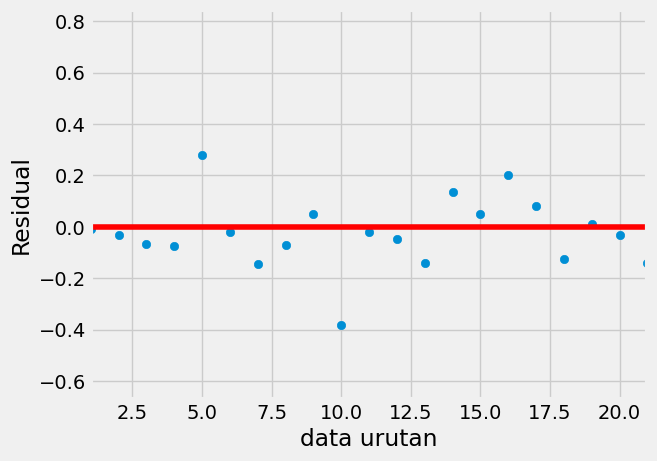

In [224]:
# Plot memeriksa asumsi residual tidak terjadi autokorelasi
urutan_pengamatan = pd.Series(range(1,2001))
plt.scatter(urutan_pengamatan, residual);
plt.axhline(0, color='red')
plt.xlabel('data urutan');
plt.ylabel('Residual');
plt.xlim([1,21]);

In [225]:
# Kesimpulan
print("Pada gambar di atas dapat disimpulkan bahwa distribusi data residual terhadap plot membentuk pola yang acak di sekitar garis nol sehingga dapat disimpulkan bahwa data residual tidak terjadi autokorelasi yang artinya residual ini memenuhi asumsi.")

Pada gambar di atas dapat disimpulkan bahwa distribusi data residual terhadap plot membentuk pola yang acak di sekitar garis nol sehingga dapat disimpulkan bahwa data residual tidak terjadi autokorelasi yang artinya residual ini memenuhi asumsi.


### Menggunakan Pengujian Statistika

In [226]:
# Pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw}")

Durbin-Watson: 2.0033696707617374


In [227]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = 0 (Terjadi Autokorelasi)
# H₁ : β₁ != 0 (Tidak Terjadi Autokorelasi)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik
dw = 2.0033696707617374
n = 2000
k = 7

# Nilai batas bawah (dl) dan batas atas (du) untuk sampel sebanyak 40 dan variabel sebanyak 3 dapat dilihat pada tabel Durbin Watson sehingga didapatkan nilai dl = 1.92046 dan du = 1.93249.
dl = 1.92046
du = 1.93249
print("Hasil dari dl adalah", round(dl,4))
print("Hasil dari du adalah", round(du,4))

## Keputusan
if dw < dl:
    print("Hasil dari Durbin-Watson adalah", round(dw,4))
    print("sehingga H0 ditolak yang artinya residual tidak terjadi autokorelasi.")
elif dw > du:
    print("Hasil dari Durbin-Watson adalah", round(dw,4))
    print("H0 gagal tolak yang artinya residual terjadi autokorelasi.")
elif dl <= dw <= du:
    print("Hasil dari Durbin-Watson adalah", round(dw,4))
    print("Tidak dapat menarik kesimpulan dengan metode Durbin-Watson bahwa residual terjadi autokorelasi atau tidak")
else:
    print("Hasil uji tidak konklusif.")

Hasil dari dl adalah 1.9205
Hasil dari du adalah 1.9325
Hasil dari Durbin-Watson adalah 2.0034
H0 gagal tolak yang artinya residual terjadi autokorelasi.


In [228]:
f'''Disimpulkan bahwa nilai Durbin-Watson didapatkan hasil yaitu {round(dw,4)}, dl didapatkan hasil yaitu {round(dl,4)}, dan du didapatkan hasil yaitu {round(du,4)} sehingga nilai Durbin-Watson lebih besar dari du maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual terjadi autokorelasi.'''

'Disimpulkan bahwa nilai Durbin-Watson didapatkan hasil yaitu 2.0034, dl didapatkan hasil yaitu 1.9205, dan du didapatkan hasil yaitu 1.9325 sehingga nilai Durbin-Watson lebih besar dari du maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual terjadi autokorelasi.'

## Memeriksa Asumsi Residual Tidak Terjadi Heteroskedastisitas

### Menggunakan Visualisasi

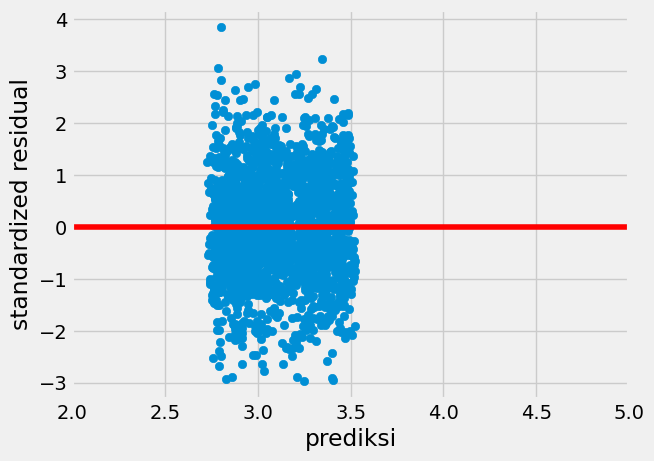

In [229]:
# Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()

# Menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual);
plt.axhline(0, color='red')
plt.xlabel('prediksi');
plt.ylabel('standardized residual');
plt.xlim([2,5]);

In [230]:
# Kesimpulan
print("Pada gambar di atas dapat disimpulkan bahwa data varians residual yang diwakili oleh standardized residualnya tidak membesar dan mengecil atau tersebar secara random sehingga dapat diartikan residual memenuhi asumsi tidak terjadi heteroskedastisitas.")

Pada gambar di atas dapat disimpulkan bahwa data varians residual yang diwakili oleh standardized residualnya tidak membesar dan mengecil atau tersebar secara random sehingga dapat diartikan residual memenuhi asumsi tidak terjadi heteroskedastisitas.


## Menggunakan Pengujian Statistika

In [231]:
# Pengujian Breush-Pagan
from statsmodels.compat import lzip
import statsmodels.formula.api as smf

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 3.1224261819329246),
 ('p-value', 0.8734504788741193),
 ('f-value', 0.5193938328338821),
 ('f p-value', 0.7940186647517824)]

In [232]:
## Menentukan Hipotesis null(H0) dan Hipotesis Alternatif(H1)
# H₀ : β₁ = 0 (Terjadi Heteroskedastisitas)
# H₁ : β₁ != 0 (Tidak Terjadi Heteroskedastisitas)

## Menentukan Tingkat Signifikansi
# α = 5%

## Menentukan Uji Statistik
BP = 3.1224261819329246
alpha = 0.05
DF = 6
chi2_tabel = stats.chi2.ppf(1 - alpha, DF)
print("Hasil dari Tabel Chi-Square adalah", chi2_tabel)

## Keputusan
if BP > chi2_tabel:
    print("Hasil dari Breush-Pagan adalah", round(BP,4))
    print("Sehingga  H0 ditolak yang artinya asumsi residual terjadi heteroskedastisitas.")
else:
    print("Hasil dari Breush-Pagan adalah", round(BP,4))
    print("Sehingga H0 gagal tolak yang artinya asumsi residual tidak terjadi heteroskedastisitas.")

Hasil dari Tabel Chi-Square adalah 12.591587243743977
Hasil dari Breush-Pagan adalah 3.1224
Sehingga H0 gagal tolak yang artinya asumsi residual tidak terjadi heteroskedastisitas.


In [233]:
# Kesimpulan
f'''Disimpulkan bahwa nilai Breush-Pagan didapatkan hasil yaitu {round(BP,4)} dan chi2 tabel didapatkan hasil yaitu {round(BP,4)} sehingga nilai Breush-Pagan lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual tidak terjadi heteroskedastisitas.'''

'Disimpulkan bahwa nilai Breush-Pagan didapatkan hasil yaitu 3.1224 dan chi2 tabel didapatkan hasil yaitu 3.1224 sehingga nilai Breush-Pagan lebih kecil dari chi2 tabel maka dapat disimpulkan bahwa H0 gagal tolak yang artinya residual tidak terjadi heteroskedastisitas.'

## Memeriksa Apakah Variabel Independen Memenuhi Asumsi Multikolinieritas

In [235]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Himpunan variabel Independen
X = df_dummy[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]

# VIF DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Menghitung VIF untuk setiap variabel
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0      x1  59.638404
1      x2   3.847777
2      x3  25.685562
3      x4   3.197030
4      x5   3.047199
5      x6   2.838533


In [236]:
# Kesimpulan
""" Dapat disimpulkan bahwa variabel independen memenuhi asumsi multikolinieritas karena terdapat hasil VIF yang lebih dari 10 yaitu pada variabel x1(Study_Hours_Per_Day) yang bernilai 59.638404 dan x3(Sleep_Hours_Per_Day) yang bernilai 25.685562."""

' Dapat disimpulkan bahwa variabel independen memenuhi asumsi multikolinieritas karena terdapat hasil VIF yang lebih dari 10 yaitu pada variabel x1(Study_Hours_Per_Day) yang bernilai 59.638404 dan x3(Sleep_Hours_Per_Day) yang bernilai 25.685562.'

# Analisis Regresi Polinomial

In [305]:
df_polinomial = df[['Extracurricular_Hours_Per_Day', 'GPA']]
df_polinomial

,Extracurricular_Hours_Per_Day,GPA
0,3.8,2.99
1,3.5,2.75
2,3.9,2.67
3,2.1,2.88
4,0.6,3.51
...,...,...
1995,0.2,3.32
1996,2.8,2.65
1997,0.0,3.14
1998,0.7,3.04


## Membuat Scatter Plot Extracurricular_Hours_Per_Day vs GPA

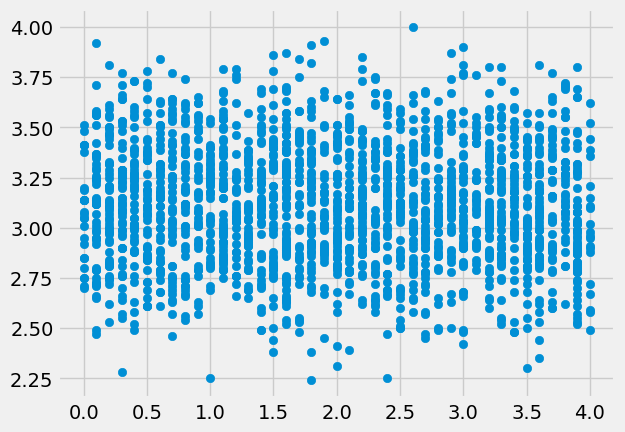

In [314]:
plt.scatter(x=df_polinomial.Extracurricular_Hours_Per_Day, y=df_polinomial.GPA)

In [316]:
print("Berdasarkan scatter plot di atas, pada sebaran titik-titik data tidak terlihat adanya hubungan linier yang jelas antara lama jam ekstrakulikuler per hari dan GPA." +
      "\nNamun, pola sebaran titik-titik data mengindikasikan kemungkinan adanya hubungan non-linier. Hubungan non-linier ini dapat berupa kurva, seperti semmisal, di mana" +
      "\nGPA mungkin meningkat hingga titik tertentu dengan bertambahnya lama ekstrakulikuler per hari, lalu menurun setelahnya.")

Berdasarkan scatter plot di atas, pada sebaran titik-titik data tidak terlihat adanya hubungan linier yang jelas antara lama jam ekstrakulikuler per hari dan GPA.
Namun, pola sebaran titik-titik data mengindikasikan kemungkinan adanya hubungan non-linier. Hubungan non-linier ini dapat berupa kurva, seperti semmisal, di mana
GPA mungkin meningkat hingga titik tertentu dengan bertambahnya lama ekstrakulikuler per hari, lalu menurun setelahnya.


## Membuat Model Regresi Polinomial Orde 1

In [326]:
x = df_polinomial.Extracurricular_Hours_Per_Day
y = df_polinomial.GPA
reg_mod = 'y~x'
model = smf.ols(formula = reg_mod, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.070
Date:                Sun, 24 Nov 2024   Prob (F-statistic):              0.150
Time:                        13:58:41   Log-Likelihood:                -419.53
No. Observations:                2000   AIC:                             843.1
Df Residuals:                    1998   BIC:                             854.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1325      0.013    235.588      0.0

In [327]:
print("Berdasarkan hasil model regresi polinomial orde 1 di atas didapatkan bahwa β₀ = 3.1325, β = -0.0083, sehingga didapatkan Ytopi = 3.1325 + (-0.0083)x." +
      "\nNamun untuk nilai p-value dari Uji F statistc sebesar 0.150 yang lebih besar dari α = 0.05, oleh karena itu variabel independennya belum signifikan" +
      "\nterhadap hasil percobaan. Sehingga dilanjutkan dengan pemodelan orde ke-2 atau kuadratik.")

Berdasarkan hasil model regresi polinomial orde 1 di atas didapatkan bahwa β₀ = 3.1325, β = -0.0083, sehingga didapatkan Ytopi = 3.1325 + (-0.0083)x.
Namun untuk nilai p-value dari Uji F statistc sebesar 0.150 yang lebih besar dari α = 0.05, oleh karena itu variabel independennya belum signifikan
terhadap hasil percobaan. Sehingga dilanjutkan dengan pemodelan orde ke-2 atau kuadratik.


In [331]:
#Interpretasi
print("Untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain." +
      "\nUntuk estimator β, apabila ada pertambahan satu satuan nilai Extracurricular_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0083.")

Untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.
Untuk estimator β, apabila ada pertambahan satu satuan nilai Extracurricular_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0083.


## Membuat Model Regresi Polinomial Orde 2

In [332]:
x = df_polinomial.Extracurricular_Hours_Per_Day
y = df_polinomial.GPA
reg_mod = 'y~I(x**2)'
model = smf.ols(formula = reg_mod, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.451
Date:                Sun, 24 Nov 2024   Prob (F-statistic):              0.118
Time:                        14:00:45   Log-Likelihood:                -419.34
No. Observations:                2000   AIC:                             842.7
Df Residuals:                    1998   BIC:                             853.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1276      0.010    313.052      0.0

In [333]:
print("Berdasarkan hasil model regresi polinomial orde 2 di atas didapatkan bahwa β₀ = 3.1276, β = -0.0022, sehingga didapatkan Ytopi = 3.1276 + (-0.0022)x." +
      "\nNamun untuk nilai p-value dari Uji F statistc sebesar 0.118 yang lebih besar dari α = 0.05, oleh karena itu variabel independennya belum signifikan" +
      "\nterhadap hasil percobaan. Sehingga dilanjutkan dengan pemodelan orde ke-3 atau kubik.")

Berdasarkan hasil model regresi polinomial orde 2 di atas didapatkan bahwa β₀ = 3.1276, β = -0.0022, sehingga didapatkan Ytopi = 3.1276 + (-0.0022)x.
Namun untuk nilai p-value dari Uji F statistc sebesar 0.118 yang lebih besar dari α = 0.05, oleh karena itu variabel independennya belum signifikan
terhadap hasil percobaan. Sehingga dilanjutkan dengan pemodelan orde ke-3 atau kubik.


In [334]:
#Interpretasi
print("Untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain." +
      "\nUntuk estimator β, apabila ada pertambahan pangkat 2 dari satu satuan nilai Extracurricular_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0022.")

Untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.
Untuk estimator β, apabila ada pertambahan pangkat 2 dari satu satuan nilai Extracurricular_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0022.


## Membuat Model Regresi Polinomial Orde 18

In [337]:
x = df_polinomial.Extracurricular_Hours_Per_Day
y = df_polinomial.GPA
reg_mod = 'y~I(x**18)'
model = smf.ols(formula = reg_mod, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.901
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0484
Time:                        14:02:17   Log-Likelihood:                -418.62
No. Observations:                2000   AIC:                             841.2
Df Residuals:                    1998   BIC:                             852.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1203      0.007    443.981      0.0

In [338]:
print("Berdasarkan hasil model regresi polinomial orde 18 di atas didapatkan bahwa β₀ = 3.1203, β₁ = -0.0000000001211, sehingga didapatkan Ytopi =  3.1203 + (-0.0000000001211)x^18." +
      "\nNamun untuk nilai p-value dari Uji F statistc sebesar 0.0484 yang lebih kecil dari α = 0.05, oleh karena itu variabel independennya sudah signifikan.")

Berdasarkan hasil model regresi polinomial orde 18 di atas didapatkan bahwa β₀ = 3.1203, β₁ = -0.0000000001211, sehingga didapatkan Ytopi =  3.1203 + (-0.0000000001211)x^18.
Namun untuk nilai p-value dari Uji F statistc sebesar 0.0484 yang lebih kecil dari α = 0.05, oleh karena itu variabel independennya sudah signifikan.


In [339]:
#Interpretasi
print("Untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain." +
      "\nUntuk estimator β, apabila ada pertambahan pangkat 3 dari satu satuan nilai Extracurricular_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0000000001211.")

Untuk estimator β₀ tidak dapat diinterpretasikan karena tidak terdapat koefisien x seperti yang lain.
Untuk estimator β, apabila ada pertambahan pangkat 3 dari satu satuan nilai Extracurricular_Hours_Per_Day, maka akan menurunkan GPA setiap mahasiswa sebesar 0.0000000001211.


In [340]:
# Nilai Prediksi Model Regresi Polinomial
model.fittedvalues

,0
0,3.087257
1,3.112790
2,3.067554
3,3.120311
4,3.120312
...,...
1995,3.120312
1996,3.120176
1997,3.120312
1998,3.120312


## Membuat Scatter Plot Nilai Prediksi Model Regresi Polinomial vs GPA

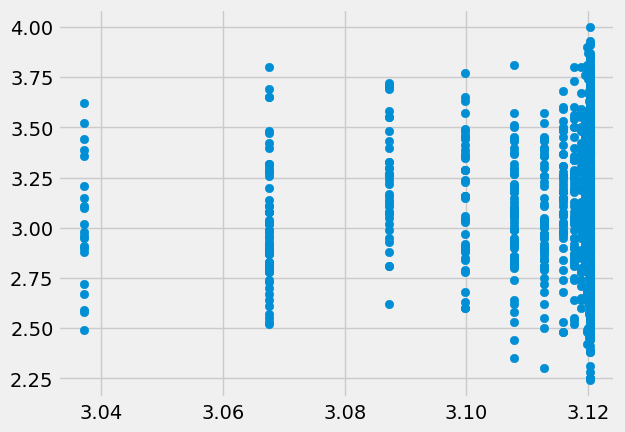

In [341]:
plt.scatter(x=model.fittedvalues, y=y)

In [346]:
print("Berdasarkan scatter plot di atas, terlihat titik-titik data tersebar dalam garis vertikal yang rapat, menunjukkan sedikit variasi pada nilai prediksi model regresi polinomial." +
      "\nNilai prediksi model cenderung berkumpul pada rentang nilai yang sangat sempit. Hal ini mengindikasikan bahwa model regresi polinomial yang digunakan mungkin kurang" +
      "\nmampu memberikan prediksi yang cukup akurat untuk nilai GPA.")

Berdasarkan scatter plot di atas, terlihat titik-titik data tersebar dalam garis vertikal yang rapat, menunjukkan sedikit variasi pada nilai prediksi model regresi polinomial.
Nilai prediksi model cenderung berkumpul pada rentang nilai yang sangat sempit. Hal ini mengindikasikan bahwa model regresi polinomial yang digunakan mungkin kurang
mampu memberikan prediksi yang cukup akurat untuk nilai GPA.


## Kesimpulan

In [347]:
print("Berdasarkan analisis regresi polinomial yang dilakukan, model regresi polinomial untuk variabel independen Extracurricular_Hours_Per Day baru signifikan pada orde ke-18." +
      "\nAnalisis Regresi Polinomial kurang cocok untuk diterapkan pada data tersebut, sehingga tidak dapat memberikan prediksi yang akurat untuk nilai GPA dengan menggunakan Extracurricular_Hours_Per_Day" +
      "\ndan kurang mampu menangkap variasi data dalam dataframe.")

Berdasarkan analisis regresi polinomial yang dilakukan, model regresi polinomial untuk variabel independen Extracurricular_Hours_Per Day baru signifikan pada orde ke-18.
Analisis Regresi Polinomial kurang cocok untuk diterapkan pada data tersebut, sehingga tidak dapat memberikan prediksi yang akurat untuk nilai GPA dengan menggunakan Extracurricular_Hours_Per_Day
dan kurang mampu menangkap variasi data dalam dataframe.
